<a href="https://colab.research.google.com/github/rubeshajith/EDA-on-Telecom-Churn-Data/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [3]:
#import the required packages
import pandas as pd
import numpy as np
#import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/content/drive/MyDrive/data/project/Telecom Churn.csv")

### Understanding  Data

In [6]:
# Viewing the top 5 rows of the data
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
# Viewing the bottom 5 rows of the data
df.tail(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [8]:
#Getting the shape of dataset with rows and columns
df.shape

(3333, 20)

In [9]:
#Getting all the columns
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

##Description of Each Features:

**STATE**: States name in code

**Account Length**: Length of The Account

**Area Code**: Code Number of Area

**International Plan**: Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

**Voice Mail Plan**: Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

**Number vmail messages**: Number of Voice Mail Messages 

**Total day minutes**: Total Number of Minutes Spent in Morning

**Total day calls**: Total Number of Calls made in Morning.

**Total day charge**: Total Charge to the Customers in Morning.

**Total eve minutes**: Total Number of Minutes Spent in Evening

**Total eve calls**: Total Number of Calls made r in Evening.

**Total eve charge**: Total Charge to the Customers in Morning.

**Total night minutes**: Total Number of Minutes Spent in the Night.

**Total night calls**: Total Number of Calls made in Night.

**Total night charge**: Total Charge to the Customers in Night.

**Total intl minutes**: Total Number of minutes spent in international calls.

**Total intl calls**: Total Number of calls made internationally

**Total intl charge**: Total charge for all the international call

**Customer service calls**: Number of customer service calls made by customer

**Churn**: Customer Churn, True means churned customer, False means retained customer

In [10]:
#Getting the data types of all the columns
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [11]:
#checking Dtype and Null values in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [12]:
# finding unique values in each column
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [13]:
#Looking for the description of the dataset to get insights of the data
df.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [14]:
#check for count of missing values in each column.
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [15]:
# Checking Duplicate Values
len(df[df.duplicated()])

0

As of now There are 3333 rows and 20 columns in above dataset.

* out of which there are 1 boolean data type i.e churn

* 8 float data type,

* 8 integer data type,

* 3 object data type i.e catagarical value are there.

* There are no missing value present so no need to do the missing value imputation,

* And also there are no duplicate value present.

# Exploratory Data Analysis

## Univariate Analysis for each column

Let's plot both distribution and boxplot for vistualizing them

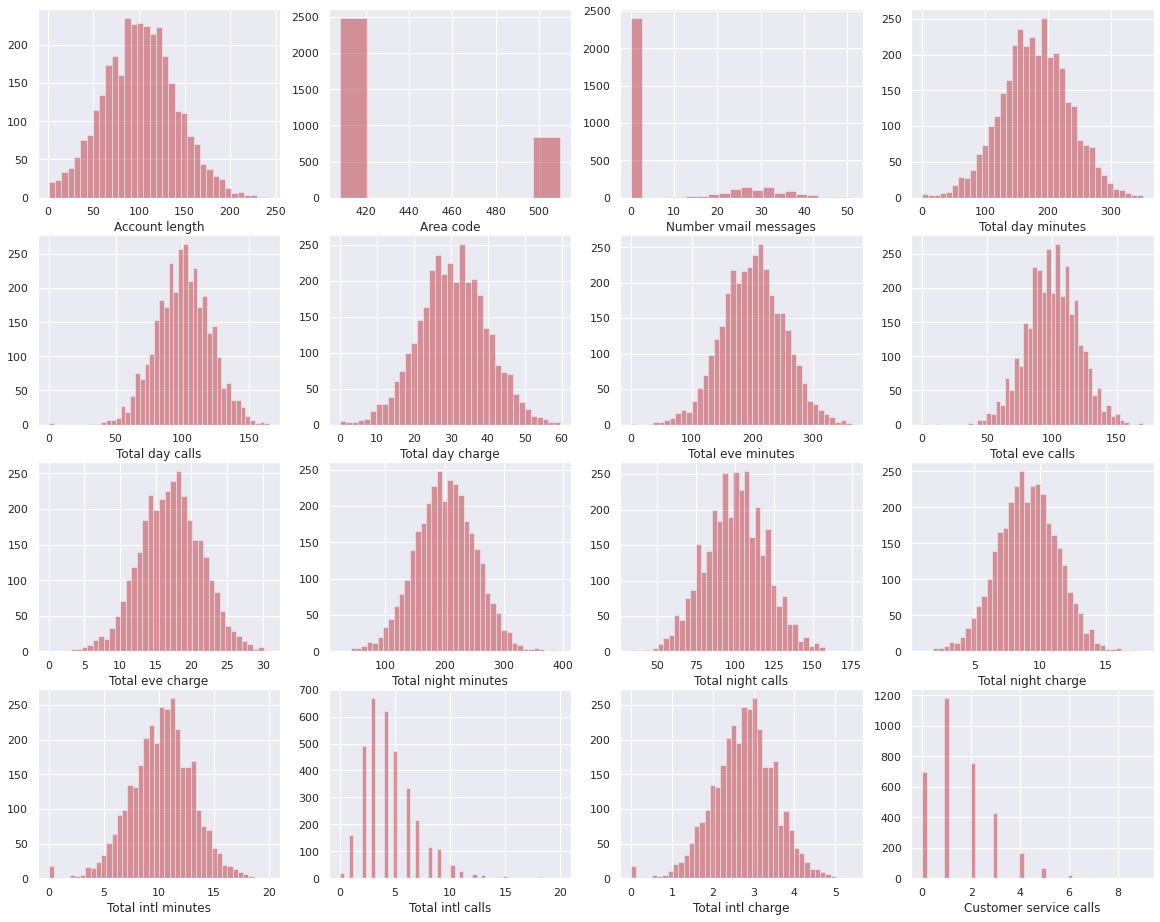

In [140]:
# plotting distplot for each column (numeric columns)
numeric_col_df = df.select_dtypes(exclude=['object','bool'])
i=1
plt.figure(figsize=(20,16))
for column in numeric_col_df:
  plt.subplot(4,4,i)
  sns.distplot(numeric_col_df[column],color="#b20710",kde=False)
  i+=1
plt.show()

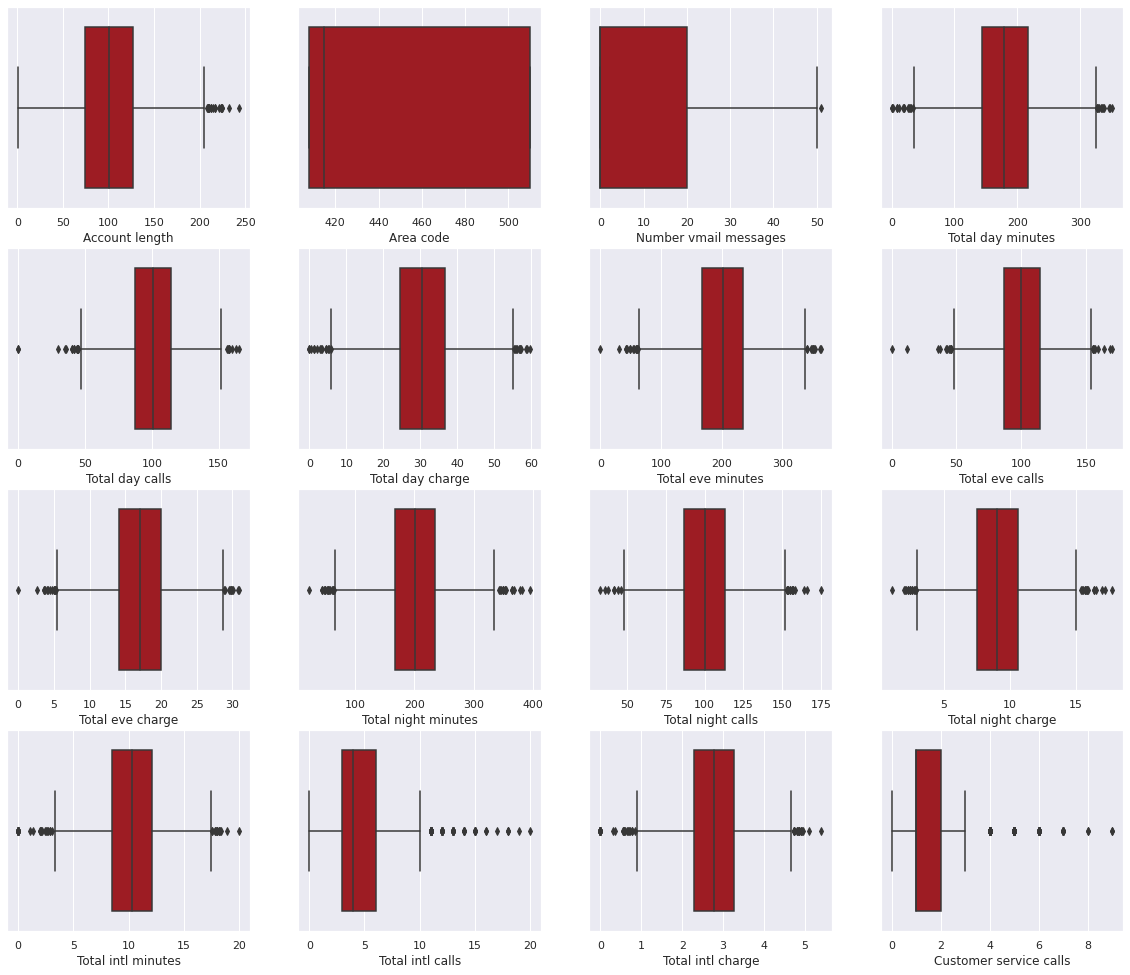

In [144]:
# plotting boxplot for each column (numeric columns)
i=1
plt.figure(figsize=(20,17))
for column in numeric_col_df:
  plt.subplot(4,4,i)
  sns.boxplot(numeric_col_df[column],color="#b20710")
  i+=1
plt.show()

## Analyzing Each Feature and with its Dependent Variable, i.e "Churn"
Univariate and Bivariate analysis

### Target Variable Churn

In [16]:
#Printing the unique value inside "churn" column
df["Churn"].unique()

array([False,  True])

In [17]:
#Printing the count of true and false in 'churn' feature
print(df.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


In [18]:
sns.set_palette("crest")

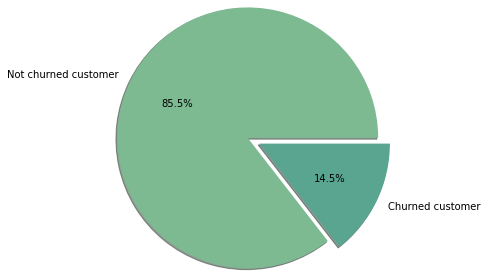

In [19]:
#To get the Donut Plot to analyze churn
plt.figure(figsize=(7,3))
plt.pie(df['Churn'].value_counts(), explode = (0, 0.2),autopct='%1.1f%%',shadow=True,radius = 2.0,
                labels = ['Not churned customer','Churned customer'])
plt.show()

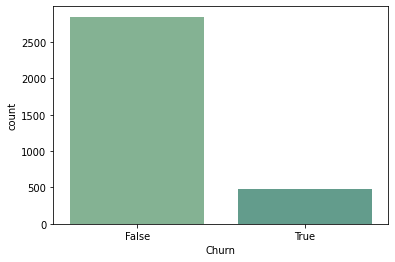

In [20]:
#let's see churn by using countplot
sns.countplot(x=df.Churn)

After analyzing the churn column, we had little to say like almost 15% of customers have churned. let's see what other features say to us and what relation we get after correlated with chur

### Analyzing State Column

In [21]:
#printing the unique value of sate column
df['State'].nunique()

51

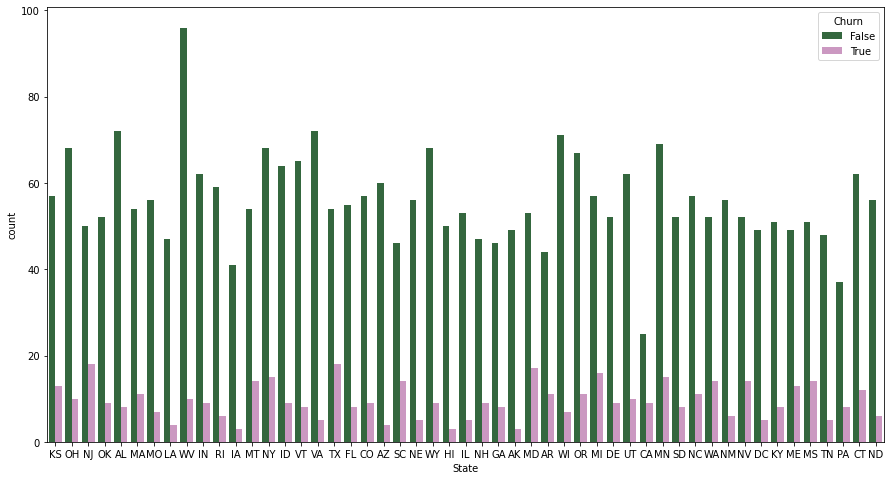

In [22]:
#Comparison churn with state by using countplot
plt.figure(figsize=(15,8))
ax = sns.countplot(x='State', hue="Churn", data=df,palette="cubehelix")
plt.show()

In [145]:
#calculate State vs Churn percentage
state_churn = pd.crosstab(df["State"],df["Churn"])
state_churn['Churned_percent'] = state_churn.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(state_churn.sort_values(by="Churned_percent",ascending=False))

Churn  False  True  Churned_percent
State                              
NJ        50    18        26.470588
CA        25     9        26.470588
TX        54    18        25.000000
MD        53    17        24.285714
SC        46    14        23.333333
MI        57    16        21.917808
MS        51    14        21.538462
NV        52    14        21.212121
WA        52    14        21.212121
ME        49    13        20.967742
MT        54    14        20.588235
AR        44    11        20.000000
KS        57    13        18.571429
NY        68    15        18.072289
MN        69    15        17.857143
PA        37     8        17.777778
MA        54    11        16.923077
CT        62    12        16.216216
NC        57    11        16.176471
NH        47     9        16.071429
GA        46     8        14.814815
DE        52     9        14.754098
OK        52     9        14.754098
OR        67    11        14.102564
UT        62    10        13.888889
CO        57     9        13

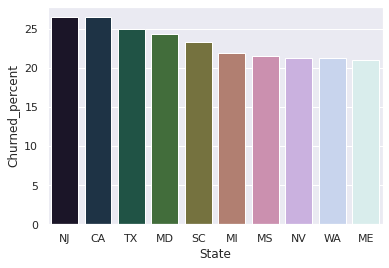

In [146]:
# plotting top 10 churned states
top_ten_state_churned = state_churn.sort_values(by="Churned_percent",ascending=False).head(10)
sns.barplot(x= top_ten_state_churned.index,y=top_ten_state_churned["Churned_percent"],palette="cubehelix")


* The above plot have the top 10 Churned States

* From above DataFrame we can see 51 unique state present with their churned rate.

* From the above analysis CA, NJ, TX, MD, SC, MI, MS, NV, WA, ME are the States with higher churn rate of more than 20.
* From the above top 10, CA state has the least customer and also with high churn rate
* NJ and CA States have equal churned rate
* NV and WA States too have equal churned rate
* HI State has the least churned rate compared to all States, AK and AZ States are preceding to it.
* The reason for this churn rate from a particular state may be due to the low coverage of the **Cellular Network**. Especially CA state because of its low customer and high churn rate

### Analyzing Area Code column

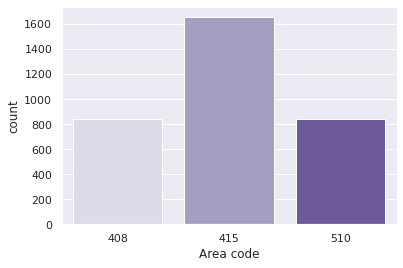

In [148]:
sns.countplot(x='Area code', data=df,palette="Purples")

In [147]:
#calculate Area code vs Churn percentage
area_code_churn = pd.crosstab(df["Area code"],df["Churn"])
area_code_churn['Churned_percent'] = area_code_churn.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(area_code_churn)

Churn      False  True  Churned_percent
Area code                              
408          716   122        14.558473
415         1419   236        14.259819
510          715   125        14.880952


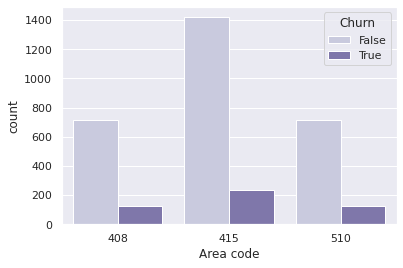

In [26]:
# plotting area code with churned
ax = sns.countplot(x='Area code', hue="Churn", data=df,palette="Purples")
plt.show()


In the above data, we notice only 3 Area codes, i.e 408,415,510 and the churn rate of these area codes are almost same.

we don't think there is any kind of relation present between the "area code" and"churn" due to which the customer leaves the operator.

### Analyzing Account Length column

In [27]:
#Separating churn and non churn customers
churn_df = df[df["Churn"] == bool(True)]
not_churn_df = df[df["Churn"] == bool(False)]

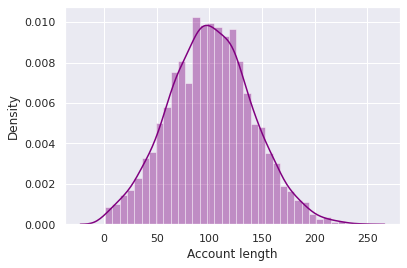

In [28]:
#Plotting distplot for "Account length" column
sns.distplot(df['Account length'],color="purple")

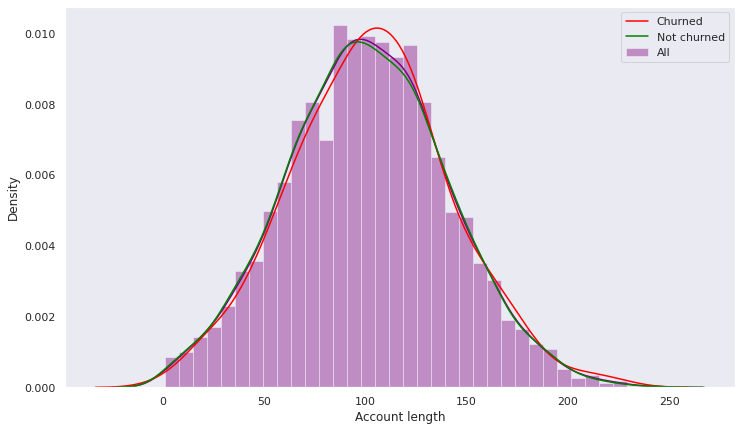

In [29]:
# plotting distplot Acc. length column and their churned and not churned all together
plt.figure(figsize=(12,7))
sns.distplot(df['Account length'],color = 'purple',label="All")
sns.kdeplot(churn_df['Account length'],color = "red",label="Churned")
sns.kdeplot(not_churn_df['Account length'],color = 'green',label="Not churned")
plt.grid(False)
plt.legend()

After analyzing various aspects of the "account length" column we didn't found any useful relation to churn. so we aren't able to build any connection to the churn as of now. let's see what other features say about the churn.

### Analyzing International Plan column

In [125]:
# setting palette color
sns.set_palette("BuPu")

In [126]:
#Show count value of 'yes','no'
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

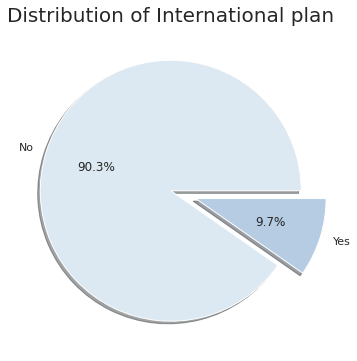

In [150]:
#Plotting Pie plot to analyze the distribution of International Plan
plt.figure(figsize=(10,6))
plt.pie(df['International plan'].value_counts(), explode = (0, 0.2),autopct='%1.1f%%',shadow=True, labels = ['No','Yes'])
plt.title('Distribution of International plan',fontsize = 20)
plt.show()

In [149]:
#Calculate the International Plan vs Churned percentage 
International_plan_data = pd.crosstab(df["International plan"],df["Churn"])
International_plan_data['Churned Percentage'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_data)

Churn               False  True  Churned Percentage
International plan                                 
No                   2664   346           11.495017
Yes                   186   137           42.414861


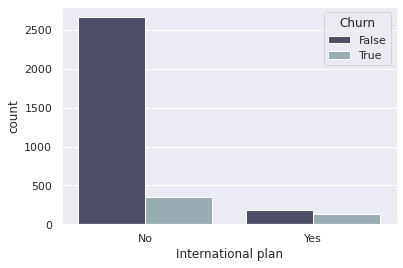

In [188]:
#Analysing International plan with churn
sns.countplot(x='International plan',hue="Churn",data = df,palette="bone")

From the above data we get

There are 3010 customers who dont have a international plan.

There are 323 customers who have a international plan.

Among those who have a international plan 42.4 % people churn.

Whereas among those who dont have a international plan only 11.4 % people churn.

So basically the people who bought International plans are churning in big numbers.

Probably because of connectivity issues or high call charge.

### Analyzing Voice Mail Plan column

In [152]:
sns.set_palette("vlag")

In [37]:
#show the unique value of the "Voice mail plan" column
df["Voice mail plan"].unique()

array(['Yes', 'No'], dtype=object)

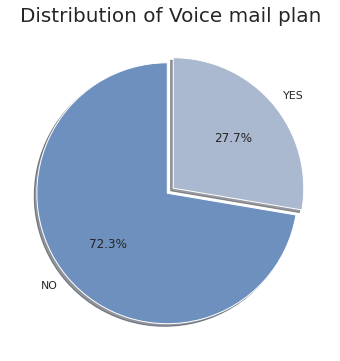

In [153]:
#To get the Donut Plot to analyze Voice mail plan
plt.figure(figsize=(10,6))
plt.pie(df['Voice mail plan'].value_counts(), explode =[0.03,0.03],autopct='%1.1f%%',startangle=90,shadow=True, labels = ['NO','YES'])
plt.title('Distribution of Voice mail plan',fontsize = 20)
plt.show()

In [39]:
#Calculating Voice Mail Plan column's Churned percentage
Voice_mail_plan_data = pd.crosstab(df["Voice mail plan"],df["Churn"])
Voice_mail_plan_data['Percentage Churn'] = Voice_mail_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Voice_mail_plan_data)

Churn            False  True  Percentage Churn
Voice mail plan                               
No                2008   403         16.715056
Yes                842    80          8.676790


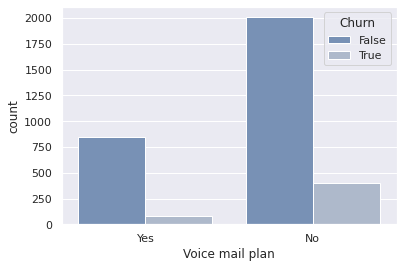

In [40]:
#Analysing  Voice Mail Plan column with churn   (bivariate)
sns.countplot(x='Voice mail plan',hue="Churn",data = df)

As we can see there is are no clear relation between voice mail plan and churn so we can't clearly say anything so let's move to the next voice mail feature i.e number of voice mail, let's see what it gives to us.

### Analyzing Number vmail messages column

In [41]:
#Unique values in Number vmail messages column
df['Number vmail messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

In [183]:
#Printing the data of 'Number vmail messages'
df['Number vmail messages'].value_counts().to_frame().T

,0,31,29,28,33,27,30,24,26,32,25,23,36,22,35,39,34,37,21,38,20,19,40,42,17,16,41,43,15,18,44,14,45,12,46,13,47,50,9,8,11,48,49,4,10,51
Number vmail messages,2411,60,53,51,46,44,44,42,41,41,37,36,34,32,32,30,29,29,28,25,22,19,16,15,14,13,13,9,9,7,7,7,6,6,4,4,3,2,2,2,2,2,1,1,1,1


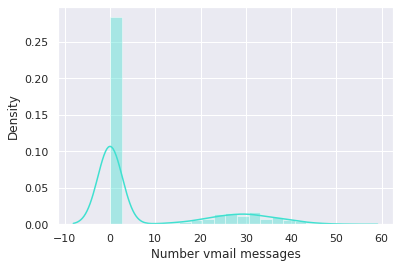

In [44]:
#Analysing by using displot
sns.distplot(df['Number vmail messages'],color="turquoise")

Almost 72% of the data is 0, which means about 72% of people doesnt use vmail messages

In [46]:
# 
df.loc[df['Number vmail messages']==0]['Churn'].value_counts()

False    2008
True      403
Name: Churn, dtype: int64

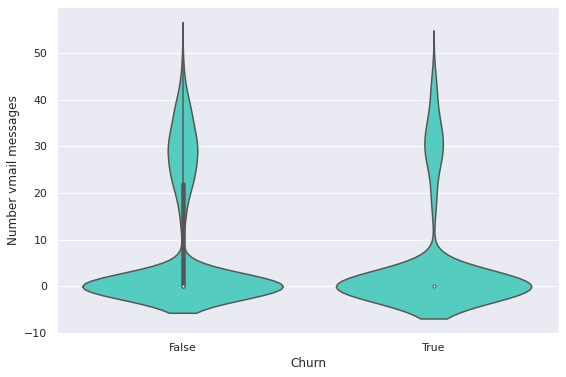

In [45]:
plt.figure(figsize=(9,6))
sns.violinplot(x = 'Churn', y = 'Number vmail messages', data = df, color="turquoise")

After analyzing the above voice mail feature data we get an insight that when there are more than 20 voice-mail messages then there is a churn

For that, we need to improve the voice mail quality.

* It is observed from the above analysis that, mostly because of bad customer service, people tend to leave the operator.

* The above data indicating that those customers who called the service center 5 times or above those customer churn percentage is higher than 60%,

* And customers who have called once also have a high churn rate indicating their issue was not solved in the first attempt.

* So operator should work to improve the service call.

### Analyzing all calls minutes,all calls, all calls charge together

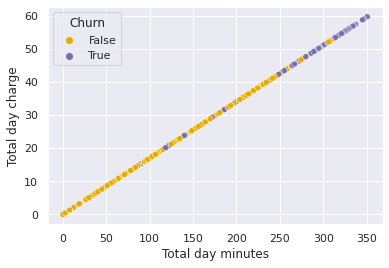

In [60]:
sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", 
                data=df,palette="Dark2_r")

In [189]:
df.loc[(df["Total day minutes"]>240) & (df["Churn"]==bool(True))]["International plan"].value_counts()

No     147
Yes     33
Name: International plan, dtype: int64

it's evident from the graph that there exists a perfect linear relationship between between Mins and its corresponding Charge, which is obvious,also most churned customer seems to have spent more minute on call

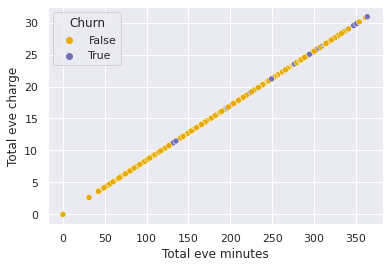

In [61]:
sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=df,palette='Dark2_r')


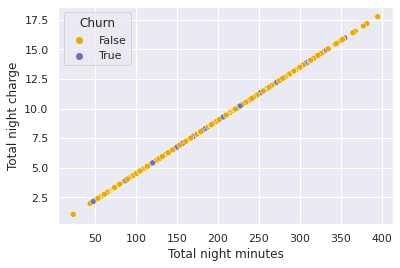

In [63]:
#show the relation using scatter plot
sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=df,palette='Dark2_r')

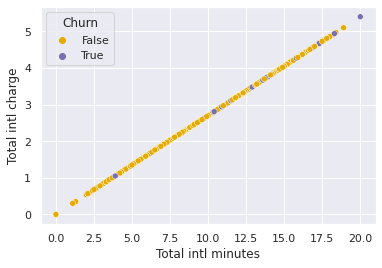

In [64]:

#show the relation using scatter plot
sns.scatterplot(x="Total intl minutes", y="Total intl charge", hue="Churn", data=df,palette='Dark2_r')

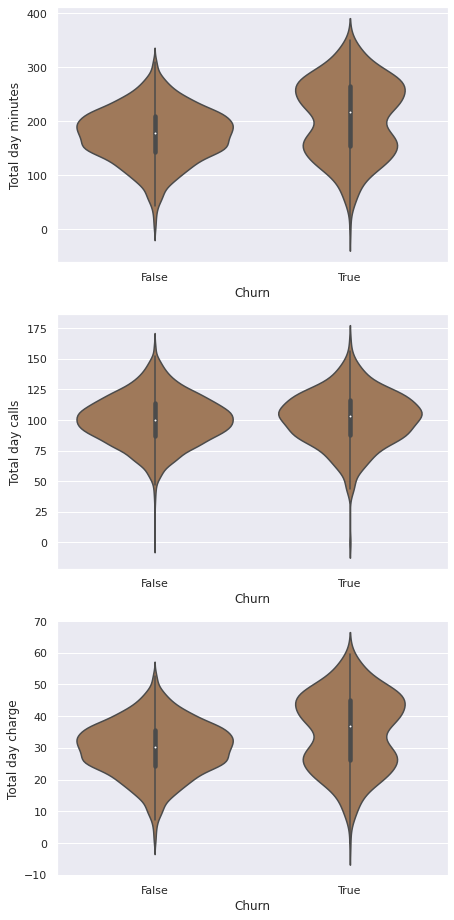

In [81]:
plt.figure(figsize=(7,16))
plt.subplot(3,1,1)
sns.violinplot(x = 'Churn', y = 'Total day minutes', data = df, color="#AB784E")
plt.subplot(3,1,2)
sns.violinplot(x = 'Churn', y = 'Total day calls', data = df, color="#AB784E")
plt.subplot(3,1,3)
sns.violinplot(x = 'Churn', y = 'Total day charge', data = df, color="#AB784E")

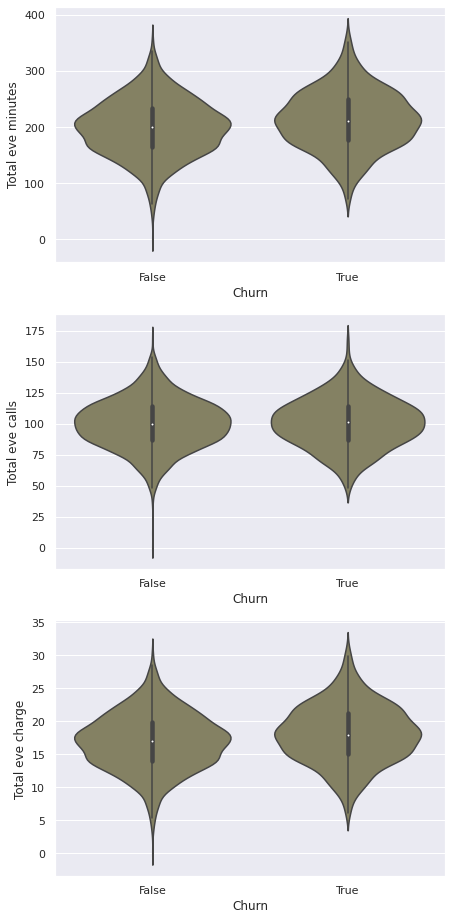

In [185]:
# for evening minutes , no. of calls, and charges .
plt.figure(figsize=(7,16))
plt.subplot(3,1,1)
sns.violinplot(x = 'Churn', y = 'Total eve minutes', data = df, color="#8A865D")
plt.subplot(3,1,2)
sns.violinplot(x = 'Churn', y = 'Total eve calls', data = df, color="#8A865D")
plt.subplot(3,1,3)
sns.violinplot(x = 'Churn', y = 'Total eve charge', data = df, color="#8A865D")

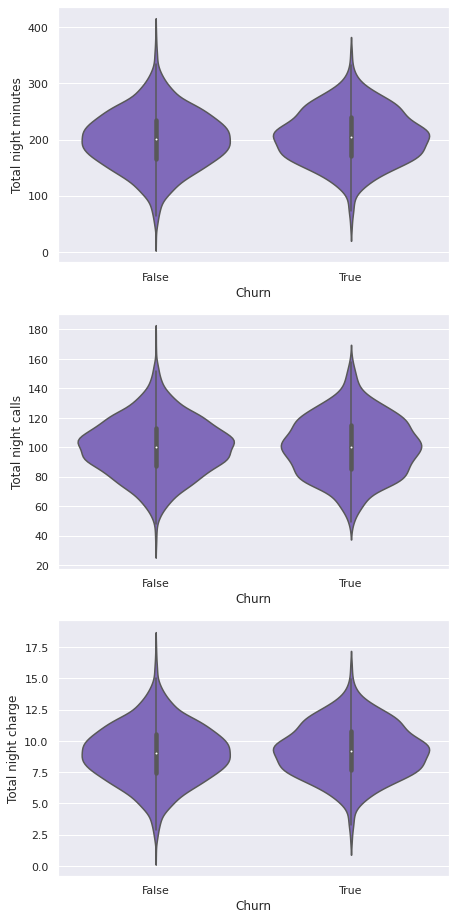

In [86]:
# for evening minutes , no. of calls, and charges .
plt.figure(figsize=(7,16))
plt.subplot(3,1,1)
sns.violinplot(x = 'Churn', y = 'Total night minutes', data = df, color="#7A5DC7")
plt.subplot(3,1,2)
sns.violinplot(x = 'Churn', y = 'Total night calls', data = df, color="#7A5DC7")
plt.subplot(3,1,3)
sns.violinplot(x = 'Churn', y = 'Total night charge', data = df, color="#7A5DC7")

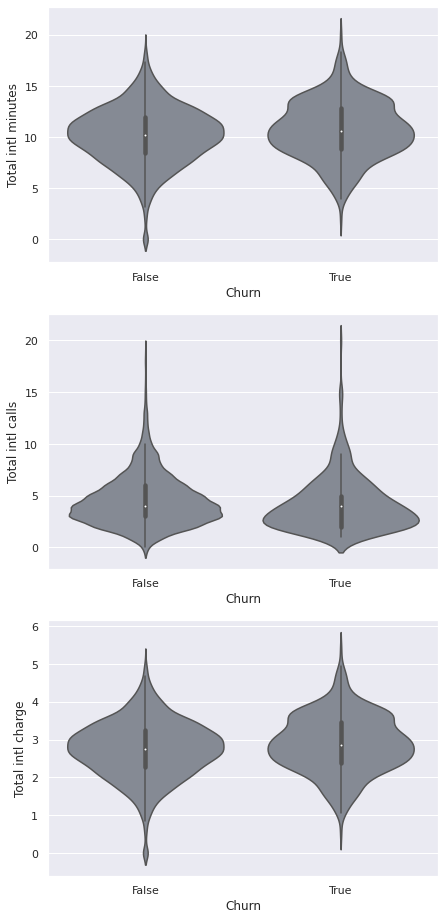

In [87]:
plt.figure(figsize=(7,16))
plt.subplot(3,1,1)
sns.violinplot(x = 'Churn', y = 'Total intl minutes', data = df, color="#838996")
plt.subplot(3,1,2)
sns.violinplot(x = 'Churn', y = 'Total intl calls', data = df, color="#838996")
plt.subplot(3,1,3)
sns.violinplot(x = 'Churn', y = 'Total intl charge', data = df, color="#838996")

In [182]:
df.loc[(df["International plan"]=="Yes") & (df["Churn"]==bool(True))]["State"].value_counts().to_frame().T

,MD,ME,NC,NV,KS,MI,MA,IL,MN,DE,AR,TX,NY,CT,WA,NH,OH,OK,RI,GA,WY,VA,PA,MS,NJ,WI,AL,CO,TN,VT,FL,SD,WV,KY,CA,NM,AZ,SC,MO,UT,ID,OR,ND,MT,AK
State,6,6,6,6,6,6,5,5,5,5,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1


### Analyzing "Customer service calls" column

In [48]:
sns.set_palette("BuPu")
#Printing the data of customer service calls 
df['Customer service calls'].value_counts()


1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [49]:
#Calculating the Customer service calls vs Churn percentage
Customer_service_calls_data = pd.crosstab(df['Customer service calls'],df["Churn"])
Customer_service_calls_data['Percentage_Churn'] = Customer_service_calls_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Customer_service_calls_data)

Churn                   False  True  Percentage_Churn
Customer service calls                               
0                         605    92         13.199426
1                        1059   122         10.330229
2                         672    87         11.462451
3                         385    44         10.256410
4                          90    76         45.783133
5                          26    40         60.606061
6                           8    14         63.636364
7                           4     5         55.555556
8                           1     1         50.000000
9                           0     2        100.000000


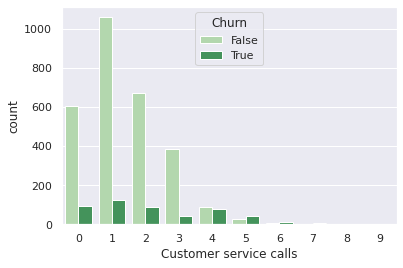

In [51]:
#Analysing using countplot
sns.countplot(x='Customer service calls',hue="Churn",data = df,palette="Greens")

# Multivariate Analysis

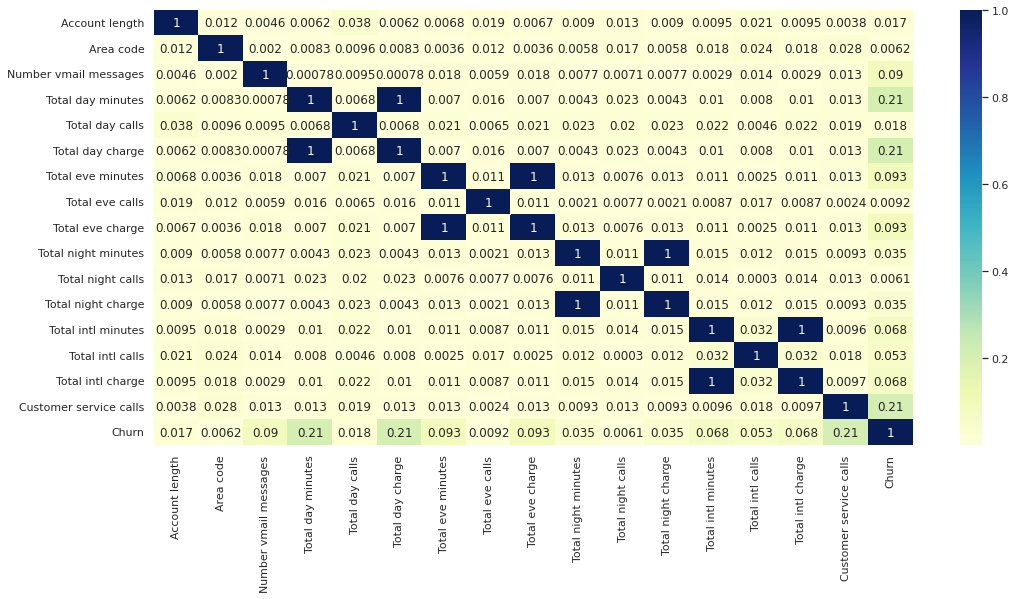

In [129]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='YlGnBu')

In [130]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

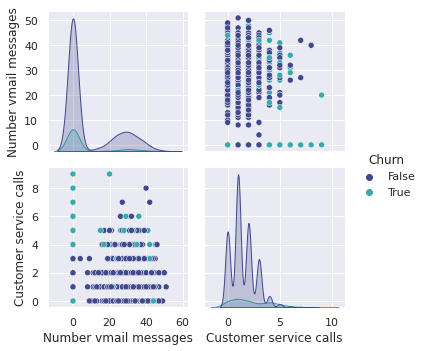

In [138]:
sns.pairplot(df,vars=["Number vmail messages",'Customer service calls'
      ],hue="Churn",palette="mako")

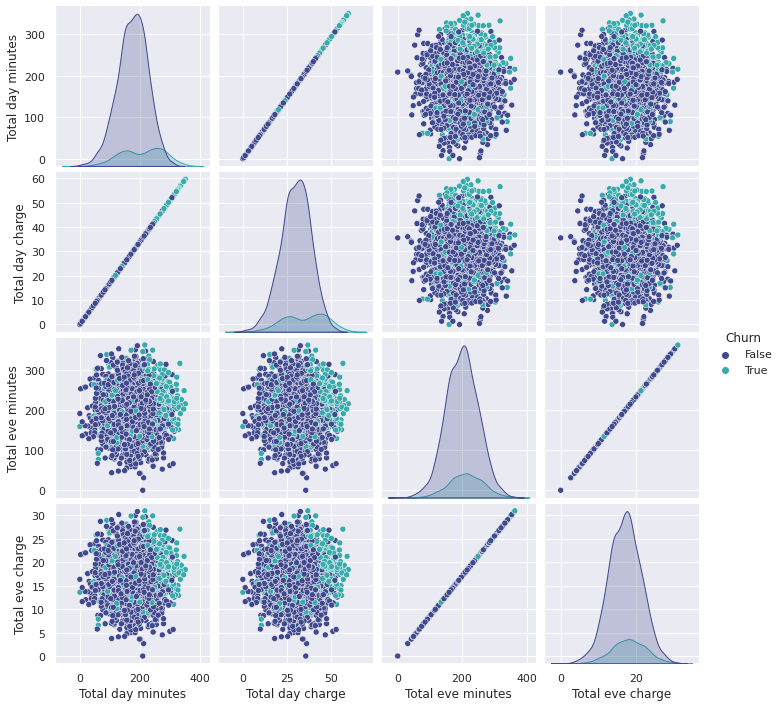

In [139]:
sns.pairplot(df,vars=["Total day minutes","Total day charge","Total eve minutes","Total eve charge"],hue="Churn",palette="mako")

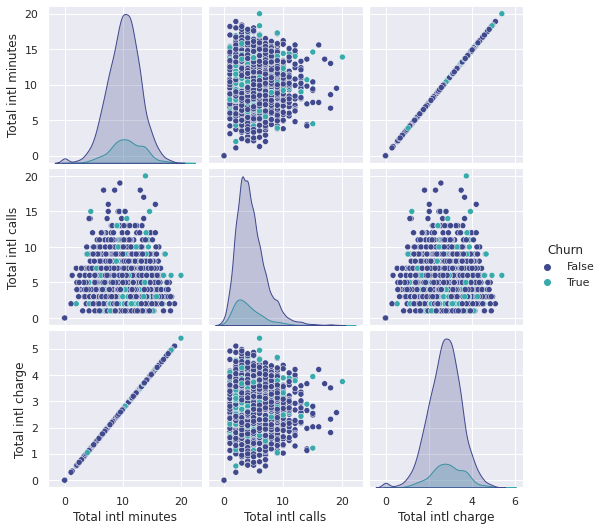

In [135]:
sns.pairplot(df,vars=[
        "Total intl minutes","Total intl calls","Total intl charge",],hue="Churn",palette="mako")

# CONCLUSION

From the above exploratory data analysis this are the following conclusions that can be incurred:
* Some states have higher churn rate than other, for which network issues could the reason because if the competitor company had low tariff for calls then most of the states would have shown the appprox same churn rate.
* Area and Account lenght has no relation with churn rate, hence this columns can be omitted or it can be said that the data is redundant.
* Customers with international plan ON has higher churn rate compared to customerswith international plan OFF , this could be because the customer could be unhappy with th high tariff cost or network issues.
* It could been seen that customers with vmails more than 20 (approx.) has higher churn rate.
* Customers with higher day call mins has higher churn rate compared to other , could be because of the higher charges which is quite obvious, frequent caller might have found some other company offering low tariff .
*With other varaibles such as evening ,night calls no relation could be found.
* The churn rate increases as the call to the service center increases. Customers who have called customer service three or fewer times have a markedly lower churn rate than that of customers who have called customer service four or more times.

# Reccomendations :


* They should improve in covrage area and solving network issues (both domestic as well as international.
* Give discount or create a plan in which as the day call mins increases above certain level the charges(i.e. the tariff per min) decrease means they are charged lower as compared to normal per min tariff.
* lower the interational plan tariff or provide with some discounts.
*They can provide better customer service and provide better problem solution, also take their feedback and work on the feedback suggested by the customers

After performing exploratory data analysis on the data set, this is what we have incurred from data:

There are some states where the churn rate is high as compared to others may be due to low network coverage. *Area code and Account length do not play any kind of role regarding the churn rate so,it's redundant data columns *In the International plan those customers who have this plan are churn more and also the international calling charges are also high so the customer who has the plan unsatisfied with network issues and high call charge *IN the voice mail section when there are more than 20 voice-mail messages then there is a churn so it basically means that the quality of voice mail is not good. *Total day call minutes, total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, these columns didn't play any kind of role regarding the churn rate. *In international calls data shows that the churn rate of those customers is high, those who take the international plan so it means that in international call charges are high also there is a call drop or network issue. *In Customer service calls data shows us that whenever an unsatisfied customer called the service center the churn rate is high, which means the service center didn't resolve the customer issue.

RECCOMENDATIONS:
* Improve network coverage churned state
* In international plan provide some discount plan to the customer
* Improve the voice mail quality or take feedback from the customer
* Improve the service of call center and take frequently feedback from the customer regarding their issue and try to solve it as soon as possible